In [1]:
#1. Import dataset and display first 5 rows
import pandas as pd
df = pd.read_csv("tvmarketing.csv")
print(df.head())

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [2]:
#2. Check column data types
print("\nColumn Data type:")
print(df.dtypes)


Column Data type:
TV       float64
Sales    float64
dtype: object


In [3]:
#3. Check the shape of the Data Frame (rows, columns)
print("\nshape of Data frame: ",df.shape)


shape of Data frame:  (200, 2)


In [4]:
#4. Look at summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [5]:
#5. Visualize the relationship between the features and the dependent variableusing scatterplots

import seaborn as sns
import pandas as pd
import matplotlib as plt
import numpy as np
df = pd.read_csv("tvmarketing.csv")
print(df.isnull().sum())


TV       0
Sales    0
dtype: int64


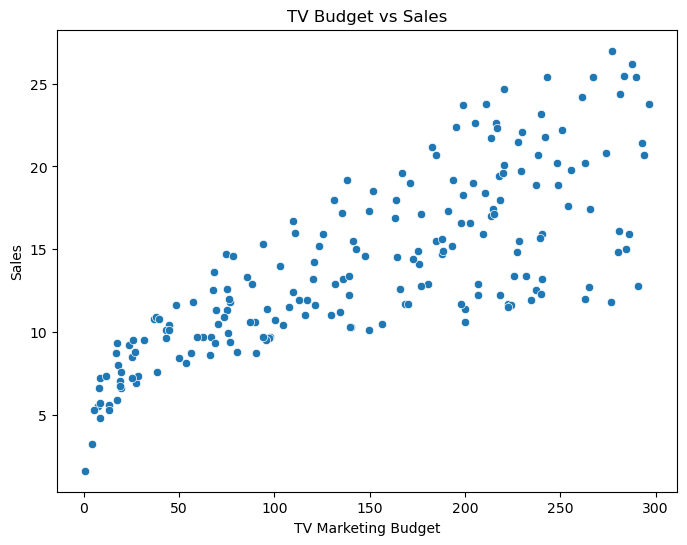

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['TV'],y=df['Sales'])
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("TV Budget vs Sales")
plt.show()

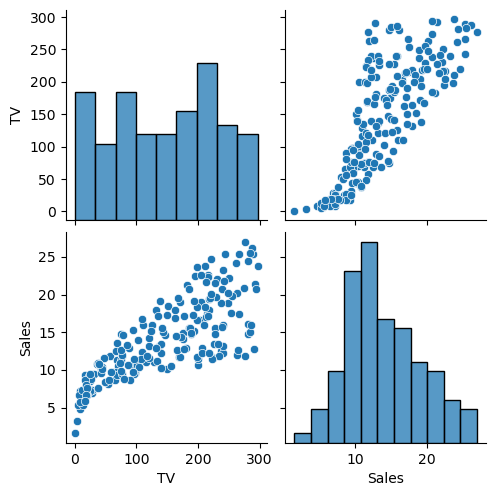

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize relationships using scatter plots
sns.pairplot(df)
plt.show()

In [10]:
#6. Prepare X (features) and y (target variable)
X = df.iloc[:, :-1]  # All columns except the last as features
y = df.iloc[:, -1]   # Last column as target variable

print("\nFeature Variables (X):")
print(X.head())

print("\nResponse Variable (y):")
print(y.head())



Feature Variables (X):
      TV
0  230.1
1   44.5
2   17.2
3  151.5
4  180.8

Response Variable (y):
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


In [18]:
#6. Prepare X (features) and y (target variable)
x = df['TV']
y = df['Sales']

print("\nFeature variable")
print(X.head())
print("\nResponse variable")
print(y.head())


Feature variable
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

Response variable
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


In [2]:
#7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train,
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


NameError: name 'X' is not defined

In [28]:
#8. Print the Shape of Train and Test Data

print("\nTraining Data Shape (X_train,y_train):", X_train.shape, y_train.shape)

print("\nTesting Data Shape (X_test,y_test):", X_test.shape, y_test.shape)


Training Data Shape (X_train,y_train): (140,) (140,)

Testing Data Shape (X_test,y_test): (60,) (60,)


In [29]:
import numpy as np
X_train_b = np.c_[np.ones((X_train.shape[0],1)), X_train]
theta = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
print("\n Coefficient value theta", theta)


 Coefficient value theta [7.23945983 0.0464078 ]


In [72]:
#predicted_y = model.predict(X_test)

#print(predicted_y[:5])

In [35]:
#9. Perform Linear Regression (on train data) without using any library andprint the coefficients values

import numpy as np

# Add bias column (intercept term) to X_train
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add a column of ones to X_train

# Compute coefficients using Normal Equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

# Print coefficients
print("Intercept (Bias):", theta[0])
print("Coefficients:", theta[1:])


Intercept (Bias): 7.239459830751142
Coefficients: [0.0464078]


In [40]:
#10. Create the model using the calculated coefficients and make predictions onthe testing set

import numpy as np

# Add bias column (intercept term) to X_test
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Add column of ones to X_test

# Predict y values
y_pred = X_test_b.dot(theta)

# Print predicted values
print("Predictions on Test Data:", y_pred)


Predictions on Test Data: [14.81785392 16.30754437 20.83230507  7.78243112 17.46309864 10.72468577
 17.30067133  9.55984994 17.56055502 15.36546598  8.7013056   9.84757831
 18.12208943  7.49006196 13.71334823 15.13806775  7.57823679 16.40964153
 10.73396733 18.25667206 17.89005042 10.38590882  9.00295631 18.88317738
 10.44159818  9.72227724 17.14752559 13.70406667 11.28622018  7.62928537
 16.5117387  10.45087974 16.46997167  8.02375169 20.26612989 18.2937983
  9.48095667 19.94127527 12.67845424  8.51567439 12.62276488 15.45364081
  9.2396361  10.1306659  17.63480751  9.01223787 10.51585066 14.07532908
 12.09371593 10.78037513 10.86854996 15.05453371  7.64320771  7.60144069
 10.78501591 13.24462943 10.64579251 20.68380011  8.14905275 16.40964153]


In [42]:
#11. Perform Linear Regression using library(sklearn)

import numpy as np

# Convert to NumPy array (if not already)
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)


In [48]:
#12. Print the intercept and coefficients

import numpy as np
from sklearn.linear_model import LinearRegression

# Ensure X_train and y_train are NumPy arrays
X_train = np.array(X_train).reshape(-1, 1)  # Ensure 2D (n_samples, n_features)
y_train = np.array(y_train).ravel()  # Ensure 1D (n_samples,)

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Print results
print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)


Intercept: 7.23945983075114
Coefficients: [0.0464078]


In [52]:
#13. Make predictions on the testing set - y_pred

import numpy as np

# Ensure x_test is 2D before making predictions
X_test = np.array(X_test).reshape(-1, 1)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Print first 5 predictions
print("\nPredictions on Test Set using Sklearn Linear Regression:")
print(y_pred[:5])



Predictions on Test Set using Sklearn Linear Regression:
[14.81785392 16.30754437 20.83230507  7.78243112 17.46309864]


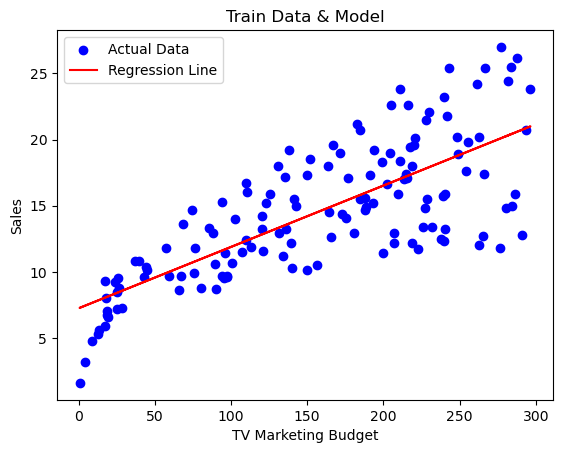

In [53]:
#14. Plot train data and the model
plt.scatter(X_train, y_train, color="blue", label="Actual Data")
plt.plot(X_train, lin_reg.predict(X_train), color="red", label="Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Train Data & Model")
plt.legend()
plt.show()

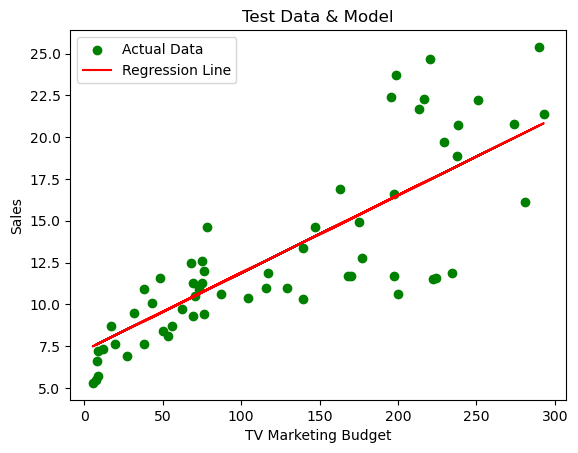

In [54]:
#15. Plot test data and the model
plt.scatter(X_test, y_test, color="green", label="Actual Data")
plt.plot(X_test, y_pred, color="red", label="Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Test Data & Model")
plt.legend()
plt.show()

In [55]:
#16. Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-Squared Value
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error:", mse)
print("R-Squared Value:", r2)



Mean Squared Error: 8.970991242413616
R-Squared Value: 0.6714477229302764


In [62]:
# Ensure X_test is also a NumPy array
X_test = np.array(X_test).reshape(-1, 1)  # Reshape for safety

# Compute predictions manually
y_pred_manual = b0 + b1 * X_test  # Apply the linear regression formula

print("\nFirst 5 Manual Predictions:")
print(y_pred_manual[:5])
print(x_pred_manual[:2])
print(z_pred_manual[:3])
print(m_pred_manual[:2])
print(n_pred_manual[:1])

NameError: name 'b0' is not defined

In [60]:
#17. Calculate and print R Squared and Adjusted R Squared values withoutanylibrary
# Compute R-Squared manually
import numpy as np

# Compute total sum of squares
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)

# Compute residual sum of squares
ss_residual = np.sum((y_test - y_pred_manual) ** 2)

# Compute R-squared
r2_manual = 1 - (ss_residual / ss_total)

print("\nManual R-Squared:", r2_manual)

# Compute Adjusted R-Squared
n = len(y_test)  # Number of observations
p = 1  # Number of predictors (independent variables)
adjusted_r2_manual = 1 - ((1 - r2_manual) * (n - 1) / (n - p - 1))

print("Manual Adjusted R-Squared:", adjusted_r2_manual)

Getting error

NameError: name 'y_pred_manual' is not defined